# Sobel

## 1. 构造Sobel滤波器

In [1]:
# 导入
import sys

sys.path.append("E:/dataFiles/github/MFlow")

In [2]:
# 读取图片
import numpy as np
from PIL import Image

img = np.asarray(
    Image.open("E:/dataFiles/github/MFlow/data/Mondrian.jpg").convert("L"))
norm_img = img / 255
w, h = norm_img.shape

print(w, h)

64 64


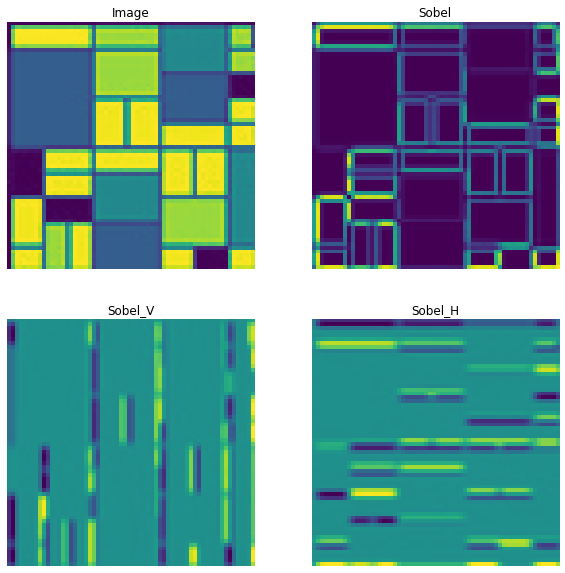

In [3]:
import matplotlib.pyplot as plt
from mflow import core, ops

%matplotlib inline

# 输入
im = core.Variable(size=(w, h), trainable=False)
# 构造算子
sobel_v = core.Variable(size=(3, 3), trainable=False)
sobel_v.setValue(np.mat([[1, 0, -1], [2, 0, -2], [1, 0, -1]]))
sobel_h = core.Variable(size=(3, 3), trainable=False)
sobel_h.setValue(sobel_v.value.T)
sobel_v_conv = ops.Convolve(im, sobel_v)
sobel_h_conv = ops.Convolve(im, sobel_h)
sobel = ops.Add(  # 平方和
    ops.Multiply(sobel_v_conv, sobel_v_conv),
    ops.Multiply(sobel_h_conv, sobel_h_conv)
)

# 开始计算
im.setValue(np.mat(norm_img))
sobel.forward()

# 显示结果
plt.figure(figsize=(10, 10))
plt.subplot(221);plt.axis("off");plt.imshow(img);plt.title("Image")
plt.subplot(222);plt.axis("off");plt.imshow(sobel.value);plt.title("Sobel")
plt.subplot(223);plt.axis("off");plt.imshow(sobel_v_conv.value);plt.title("Sobel_V")
plt.subplot(224);plt.axis("off");plt.imshow(sobel_h_conv.value);plt.title("Sobel_H")
plt.show()

## 2. 训练Sobel滤波器

In [4]:
from mflow import opts

# 超参数
lr = 0.01
epoch = 1000

with core.NameScope("SobelV"):
    # 构造可迅联的滤波器
    filter_v = core.Variable(size=(3, 3), trainable=True)
    filter_v_conv = ops.Convolve(im, filter_v)
    # 常数矩阵：-1
    minus = core.Variable(size=(w, h), trainable=False)
    minus.setValue(np.mat(-np.ones((w, h))))
    # 常数：图像总像素的倒数
    n = core.Variable(size=(1, 1), trainable=False)
    n.setValue(np.mat(1.0 / (w * h)))
    # 损失：均方误差
    error = ops.Add(sobel_v_conv, ops.Multiply(filter_v_conv, minus))
    squ_error = ops.MatMal(
        ops.Reshape(error, shape=(1, w * h)), ops.Reshape(error, shape=(w * h, 1)))
    mse = ops.MatMal(squ_error, n)
    # 优化器
    adam = opts.Adam(core.DefaultGraph, mse, lr)
    # 训练
    for ep in range(epoch):
        adam.step()
        adam.update()
        mse.forward()
        if (ep + 1) % 10 == 0:
            print("Epoch: {:d}, loss: {:.7f}.".format(ep + 1, mse.value[0, 0]))
    # 查看结果
    filter_v.forward()
    print("filter_v:\n", filter_v.value)
    print("sobel_v:\n", sobel_v.value)

Epoch: 10, loss: 0.7816594.
Epoch: 20, loss: 0.6667849.
Epoch: 30, loss: 0.5665907.
Epoch: 40, loss: 0.4796670.
Epoch: 50, loss: 0.4044264.
Epoch: 60, loss: 0.3394223.
Epoch: 70, loss: 0.2833850.
Epoch: 80, loss: 0.2352165.
Epoch: 90, loss: 0.1939696.
Epoch: 100, loss: 0.1588155.
Epoch: 110, loss: 0.1290231.
Epoch: 120, loss: 0.1039404.
Epoch: 130, loss: 0.0829819.
Epoch: 140, loss: 0.0656186.
Epoch: 150, loss: 0.0513711.
Epoch: 160, loss: 0.0398043.
Epoch: 170, loss: 0.0305242.
Epoch: 180, loss: 0.0231750.
Epoch: 190, loss: 0.0174376.
Epoch: 200, loss: 0.0130281.
Epoch: 210, loss: 0.0096965.
Epoch: 220, loss: 0.0072258.
Epoch: 230, loss: 0.0054300.
Epoch: 240, loss: 0.0041530.
Epoch: 250, loss: 0.0032657.
Epoch: 260, loss: 0.0026644.
Epoch: 270, loss: 0.0022670.
Epoch: 280, loss: 0.0020111.
Epoch: 290, loss: 0.0018500.
Epoch: 300, loss: 0.0017500.
Epoch: 310, loss: 0.0016880.
Epoch: 320, loss: 0.0016483.
Epoch: 330, loss: 0.0016210.
Epoch: 340, loss: 0.0016001.
Epoch: 350, loss: 0.001